In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('haberman.csv', names=['Patient_age','Operation_year','Axillary_nodes','Survival_status'])
data

,Patient_age,Operation_year,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


#### Haberman's Survival Data:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (1 = the patient survived 5 years or longer, 2 = the patient died within 5 years, class attribute)

In [5]:
data.head(10)

,Patient_age,Operation_year,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
data.shape

(306, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Patient_age      306 non-null    int64
 1   Operation_year   306 non-null    int64
 2   Axillary_nodes   306 non-null    int64
 3   Survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
data.describe()

,Patient_age,Operation_year,Axillary_nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
data.columns

Index(['Patient_age', 'Operation_year', 'Axillary_nodes', 'Survival_status'], dtype='object')

In [10]:
data['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

From this, we can tell that this is an imbalanced dataset.

OBJECTIVE: 
Given dataset is a binary classification problem. We have to find out whether the patients will survive more than 5 years or not.

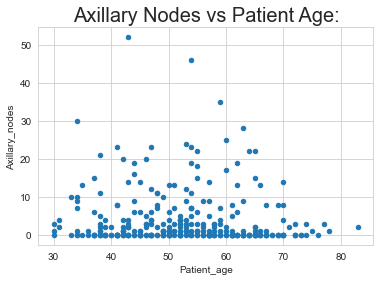

In [40]:
data.plot(kind='scatter', x='Patient_age', y='Axillary_nodes')
plt.title('Axillary Nodes vs Patient Age:', size=20)
plt.show()

These are the most important factors in determining the chances of survival.

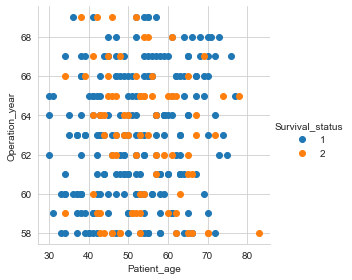

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Survival_status", height=4) \
   .map(plt.scatter, "Patient_age", "Operation_year") \
   .add_legend()
plt.show()

OBSERVATION:
1. 30-40 age interval: More chances of survival.
2. 40-70 age interval: Almost equal chances of survival and non survival.
3. 70-80 age interval: More chances of survival.
4. Above age 80: Most likely to die.

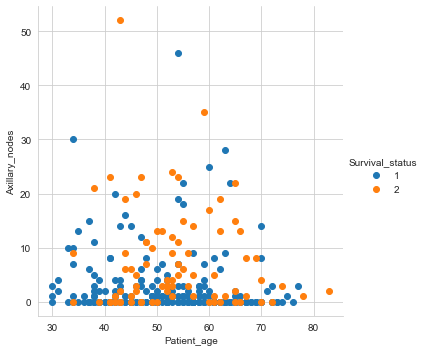

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Survival_status", height=5) \
    .map(plt.scatter, "Patient_age", "Axillary_nodes") \
    .add_legend()
plt.show()

OBSERVATION:
1. When nodes < 20 & 30 < age <= 40 then the chances of survival are much more.
2. When nodes < 10 & 40 < age <= 70 then the chances of survival and non survival are almost the same.
3. When nodes < 10 & 60 < age <= 70 then the chances of non survival are more.
4. When 10 < nodes < 20 & 30 < age <= 50 then the chances of survival are more.
5. When 10 < nodes < 20 & 50 < age <= 70 then the chances of non survival are more.

In [17]:
from itertools import combinations
def pair_plots(*args):
    combos = list(combinations([*args], 2))
    return combos, len(combos)*2 + len(args)
print(pair_plots(*data.columns[:-1]))

([('Patient_age', 'Operation_year'), ('Patient_age', 'Axillary_nodes'), ('Operation_year', 'Axillary_nodes')], 9)


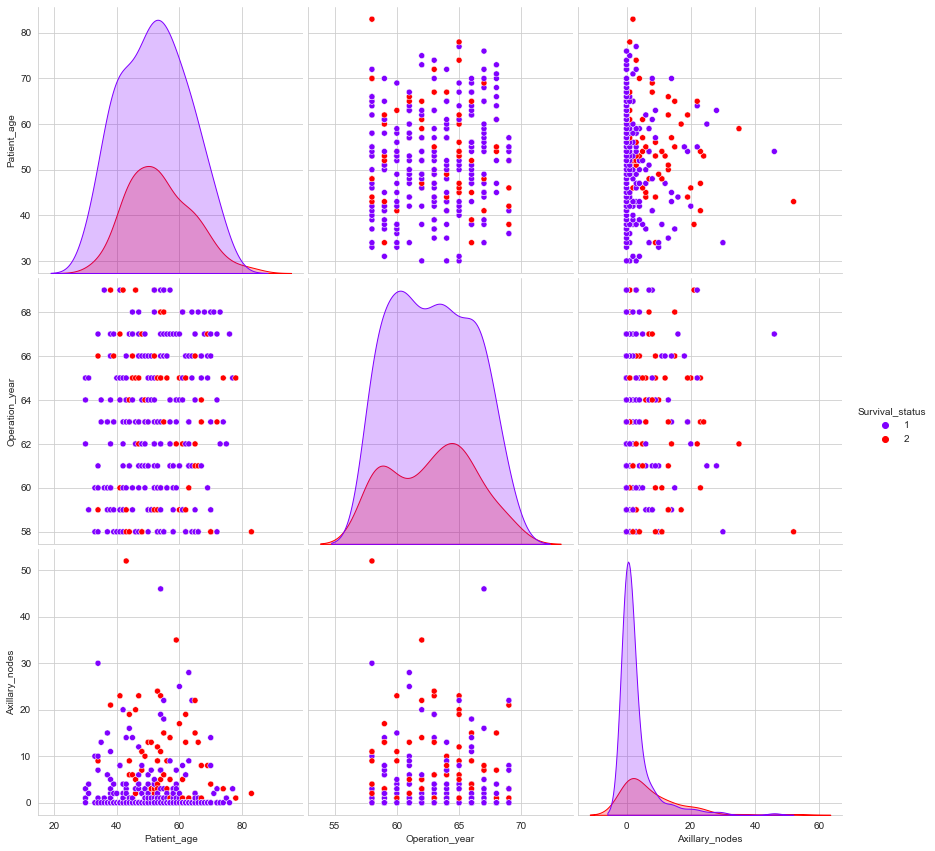

In [14]:
sns.pairplot(data, hue='Survival_status', palette='rainbow', height=4)
plt.show()

OBSERVATION:

1. These pair plots are not linearly separable.
2. It is clear that if the number of axillary nodes is very less, roughly between 0-5, then the chances of survival are more.

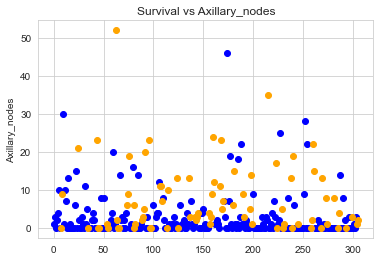

In [29]:
long_survived = data.loc[data['Survival_status']== 1]
short_survived = data.loc[data['Survival_status']== 2]

plt.plot(long_survived['Axillary_nodes'], 'o', color='blue')
plt.plot(short_survived['Axillary_nodes'], 'o', color='orange')

plt.ylabel('Axillary_nodes')
plt.title('Survival vs Axillary_nodes')
plt.show()

When nodes < 10, patients survive longer.

In [21]:
long_survived.shape

(225, 4)

In [22]:
short_survived.shape

(81, 4)

In [23]:
print(np.mean(long_survived['Patient_age']))
print(np.mean(short_survived['Patient_age']))

52.01777777777778
53.67901234567901


In [24]:
print(np.mean(long_survived['Axillary_nodes']))
print(np.mean(short_survived['Axillary_nodes']))

2.7911111111111113
7.45679012345679


In [25]:
print(np.median(long_survived['Patient_age']))
print(np.median(short_survived['Patient_age']))

52.0
53.0


In [26]:
print(np.median(long_survived['Axillary_nodes']))
print(np.median(short_survived['Axillary_nodes']))

0.0
4.0


Axillary_nodes is more informative. 
There is a lot of difference between mean and median of axillary nodes, indicating the presence of outliers.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


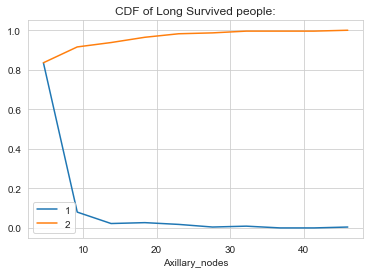

In [32]:
counts, bins = np.histogram(long_survived['Axillary_nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bins)

cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.legend(['1', '2'])
plt.xlabel('Axillary_nodes')
plt.title('CDF of Long Survived people:')
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


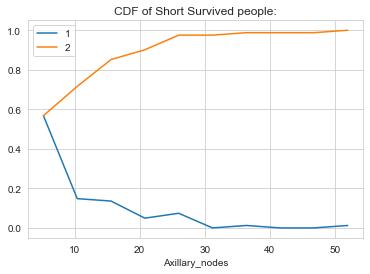

In [33]:
counts, bins = np.histogram(short_survived['Axillary_nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bins)

cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.legend(['1', '2'])
plt.xlabel('Axillary_nodes')
plt.title('CDF of Short Survived people:')
plt.show()

In [38]:
print("SURVIVAL STATUS: YES -> STATISTICS: \n")
print(long_survived.describe())
print("\n\n")
print("SURVIVAL STATUS: NO -> STATISTICS: \n")
print(short_survived.describe())

SURVIVAL STATUS: YES -> STATISTICS: 

       Patient_age  Operation_year  Axillary_nodes  Survival_status
count   225.000000      225.000000      225.000000            225.0
mean     52.017778       62.862222        2.791111              1.0
std      11.012154        3.222915        5.870318              0.0
min      30.000000       58.000000        0.000000              1.0
25%      43.000000       60.000000        0.000000              1.0
50%      52.000000       63.000000        0.000000              1.0
75%      60.000000       66.000000        3.000000              1.0
max      77.000000       69.000000       46.000000              1.0



SURVIVAL STATUS: NO -> STATISTICS: 

       Patient_age  Operation_year  Axillary_nodes  Survival_status
count    81.000000       81.000000       81.000000             81.0
mean     53.679012       62.827160        7.456790              2.0
std      10.167137        3.342118        9.185654              0.0
min      34.000000       58.000000    

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



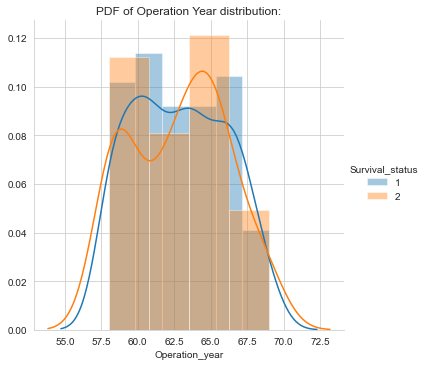

In [35]:
sns.FacetGrid(data, hue='Survival_status', height=5) \
.map(sns.distplot,'Operation_year') \
.add_legend()
plt.title('PDF of Operation Year distribution:')
plt.show()

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



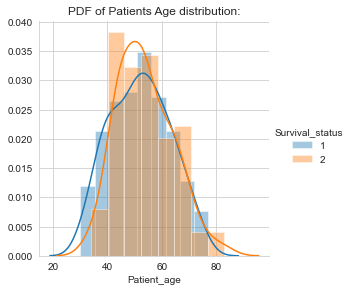

In [36]:
sns.FacetGrid(data, hue="Survival_status", height=4) \
.map(sns.distplot, "Patient_age") \
.add_legend()
plt.title('PDF of Patients Age distribution:')
plt.show()

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\BIRANCHI NARAYAN KAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



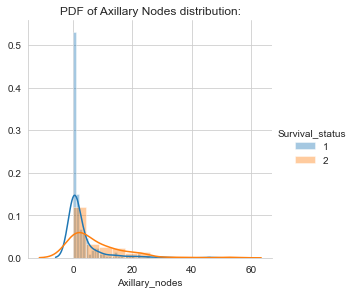

In [34]:
sns.FacetGrid(data, hue="Survival_status", height=4) \
.map(sns.distplot, "Axillary_nodes") \
.add_legend()
plt.title('PDF of Axillary Nodes distribution:')
plt.show()

When the number of axillary nodes is roughly between 0-1, chances of survival is maximum. Then the survival rate is gradually declining. But when axillary nodes is more than 20, chances of death are more.

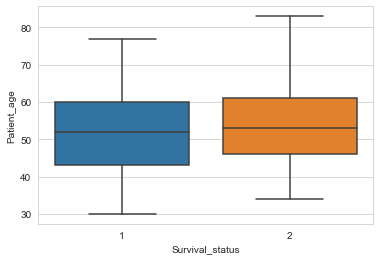

In [30]:
sns.boxplot(x='Survival_status', y='Patient_age', data=data)
plt.show()

OBSERVATION:

1. There are no outliers and much can be derived from this plot.
2. Age of survival lies between 42-60.
3. Age of non-survival lies between 45-61.

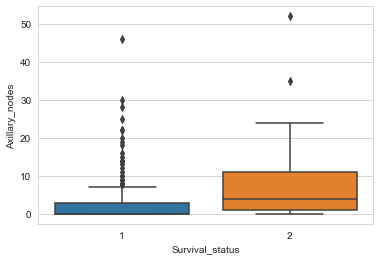

In [39]:
sns.boxplot(x='Survival_status', y='Axillary_nodes', data=data)
plt.show()

OBSERVATION:

1. There are a lot of outliers so median is preferred over mean.
2. Axillary nodes for survival lie between 0-4.
3. Axillary nodes for non-survival lie between 2-11.

In [41]:
print("Quartiles:")
for col in data.columns:
    quar = np.percentile(data[col], np.arange(0, 100, 25))
    print("Quartiles of {} is {}".format(col,quar))
    IQR = quar[3] - quar[1]
    print("Inter quartile range of {} is {} \n".format(col,IQR))

Quartiles:
Quartiles of Patient_age is [30.   44.   52.   60.75]
Inter quartile range of Patient_age is 16.75 

Quartiles of Operation_year is [58.   60.   63.   65.75]
Inter quartile range of Operation_year is 5.75 

Quartiles of Axillary_nodes is [0. 0. 1. 4.]
Inter quartile range of Axillary_nodes is 4.0 

Quartiles of Survival_status is [1. 1. 1. 2.]
Inter quartile range of Survival_status is 1.0 



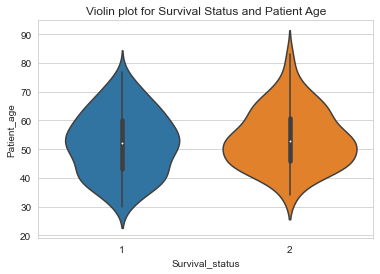

In [42]:
sns.violinplot(x="Survival_status", y="Patient_age", data=data)
plt.title("Violin plot for Survival Status and Patient Age")
plt.show()

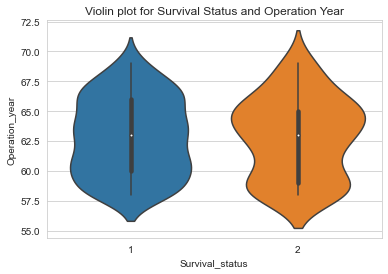

In [43]:
sns.violinplot(x="Survival_status", y="Operation_year", data=data)
plt.title("Violin plot for Survival Status and Operation Year")
plt.show()

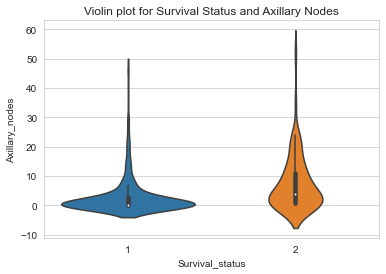

In [44]:
sns.violinplot(x="Survival_status", y="Axillary_nodes", data=data)
plt.title("Violin plot for Survival Status and Axillary Nodes")
plt.show()

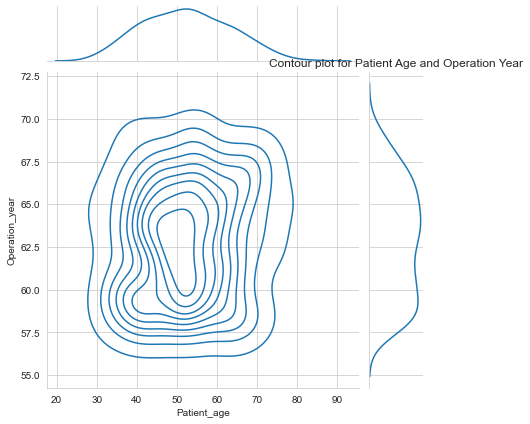

In [45]:
sns.jointplot(x="Patient_age", y="Operation_year", data=data, kind='kde')
plt.title("Contour plot for Patient Age and Operation Year")
plt.show()

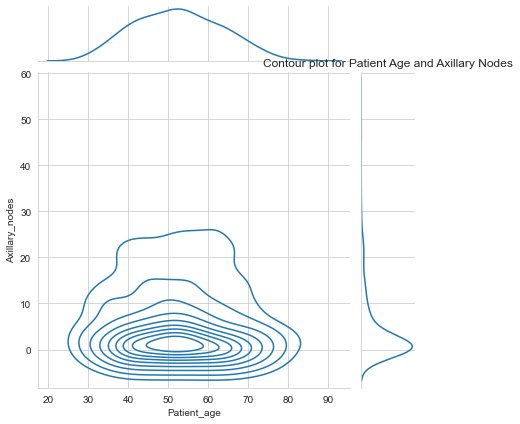

In [46]:
sns.jointplot(x="Patient_age", y="Axillary_nodes", data=data, kind='kde')
plt.title("Contour plot for Patient Age and Axillary Nodes")
plt.show()

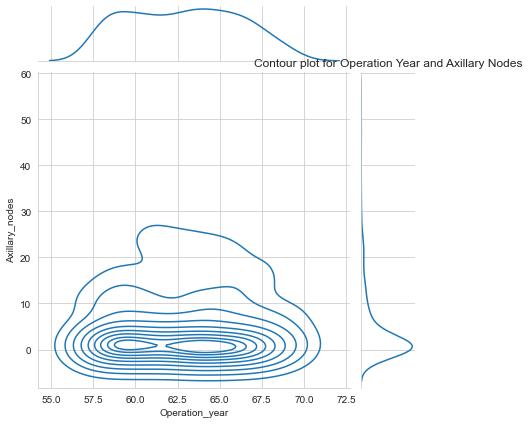

In [47]:
sns.jointplot(x="Operation_year", y="Axillary_nodes", data=data, kind='kde')
plt.title("Contour plot for Operation Year and Axillary Nodes")
plt.show()

CONCLUSION:

1. Patient Age and Axillary Nodes are the main deciding features for survival.
2. Dataset is not balanced but complete as no value is missing.
3. People with age range 40-60 have maximum chances of survival.
4. Operation year 60 had highest survival rate.
5. Operation year range 63-66 had lowest survival rate.
6. Axillary node with range 0-1 has the highest survival rate.
7. Patients between age range 30-34 survived after the treatment.
8. Patients with age > 77 were not able to survive.
9. Patients with age < 40 and axillary nodes < 30 have higher chances of survival.
10. Patients with age > 50 and axillary nodes > 10 have lower chances of survival.
11. Inter quartile range of Patient_age is 16.75 
12. Inter quartile range of Operation_year is 5.75 
13. Inter quartile range of Axillary_nodes is 4.0 
14. Pairplots are linearly inseparable.
15. Axillary_nodes feature has the most outliers.